# Part 0: Set-up

In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00


In [2]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Xintong1122/stats201-PS2-Exlanation-Prediction-Xintong/main/data/NLP/literature.csv")
df

Title  \
0   A review of the key challenges of non-fungible...   
1   Patents and intellectual property\nassets as n...   
2   Non-fungible token (NFT) markets on the Ethere...   
3   Towards a secure and trustworthy imaging with ...   
4   Non-Fungible Tokens (NFT). The Analysis of Ris...   
5   Non-Fungible Tokens (NFT) – Innovation beyond ...   
6   Non-Fungible Token (NFT): Overview, Evaluation...   
7   Prospecting non-fungible tokens in the digital...   
8   Non-Fungible Tokens: Blockchains, Scarcity, an...   
9   Secure Management of IoT Devices Based on Bloc...   
10  Crypto Collectibles, Museum Funding and OpenGL...   
11  The World of NFTs (Non-Fungible Tokens): The F...   
12  Secure Combination of IoT and Blockchain by Ph...   
13  A critical professional ethical analysis of No...   
14  Privacy Laws, Genomic Data andNon-Fungible Tokens   

                                             Abstract  
0   The nonfungible token (NFT) marketplace spiked...  
1   With the explosive development of decentralize...  
2   The market for non-fungible tokens (NFTs), tra...  
3   Non fungible tokens (NFTs) are used to define ...  
4   This study examines the risk and return charac...  
5   The COVID-19 pandemic has pushed digitalizatio...  
6   The Non-Fungible Token (NFT) market is mushroo...  
7   Non-fungible tokens (NFTs) are a highly nascen...  
8   Non-Fungible Tokens (NFTs) have garnered remar...  
9   One of the most extended applications of block...  
10  Non-fungible tokens (NFTs) make it technically...  
11  Tokenizing assets through the use of blockchai...  
12  Non-fungible tokens (NFTs) are widely used in ...  
13  Non-Fungible Tokens (NFTs) have quickly become...  
14  This article analyses the main legal requireme...

# Part I The World Cloud

## 1.1. Title

In [5]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'A review of the key challenges of non-fungible tokens,Patents and intellectual property\nassets as non‑fungible tokens; key\ntechnologies and challenges,Non-fungible token (NFT) markets on the Ethereum blockchain: temporal development, cointegration and interrelations,Towards a secure and trustworthy imaging with non-fungible tokens,Non-Fungible Tokens (NFT). The Analysis of Risk and Return,Non-Fungible Tokens (NFT) – Innovation beyond the craze,Non-Fungible Token (NFT): Overview, Evaluation, Opportunities and Challenges,Prospecting non-fungible tokens in the digital economy: Stakeholders and ecosystem, risk and opportunity,Non-Fungible Tokens: Blockchains, Scarcity, and Value,Secure Management of IoT Devices Based on Blockchain Non-fungible Tokens and Physical Unclonable Functions,Crypto Collectibles, Museum Funding and OpenGLAM: Challenges, Opportunities and the Potential of Non-Fungible Tokens (NFTs),The World of NFTs (Non-Fungible Tokens): The Future of Blockchain and Asset Owners

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stop_words = stopwords.words('english')
stop_words.extend([',',"NFT","NFTs","Challenge","Challenges","Non-Fungible","None","Non","IoT","Fungible","Token","Tokens",":","A","on","in","into","the","for"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

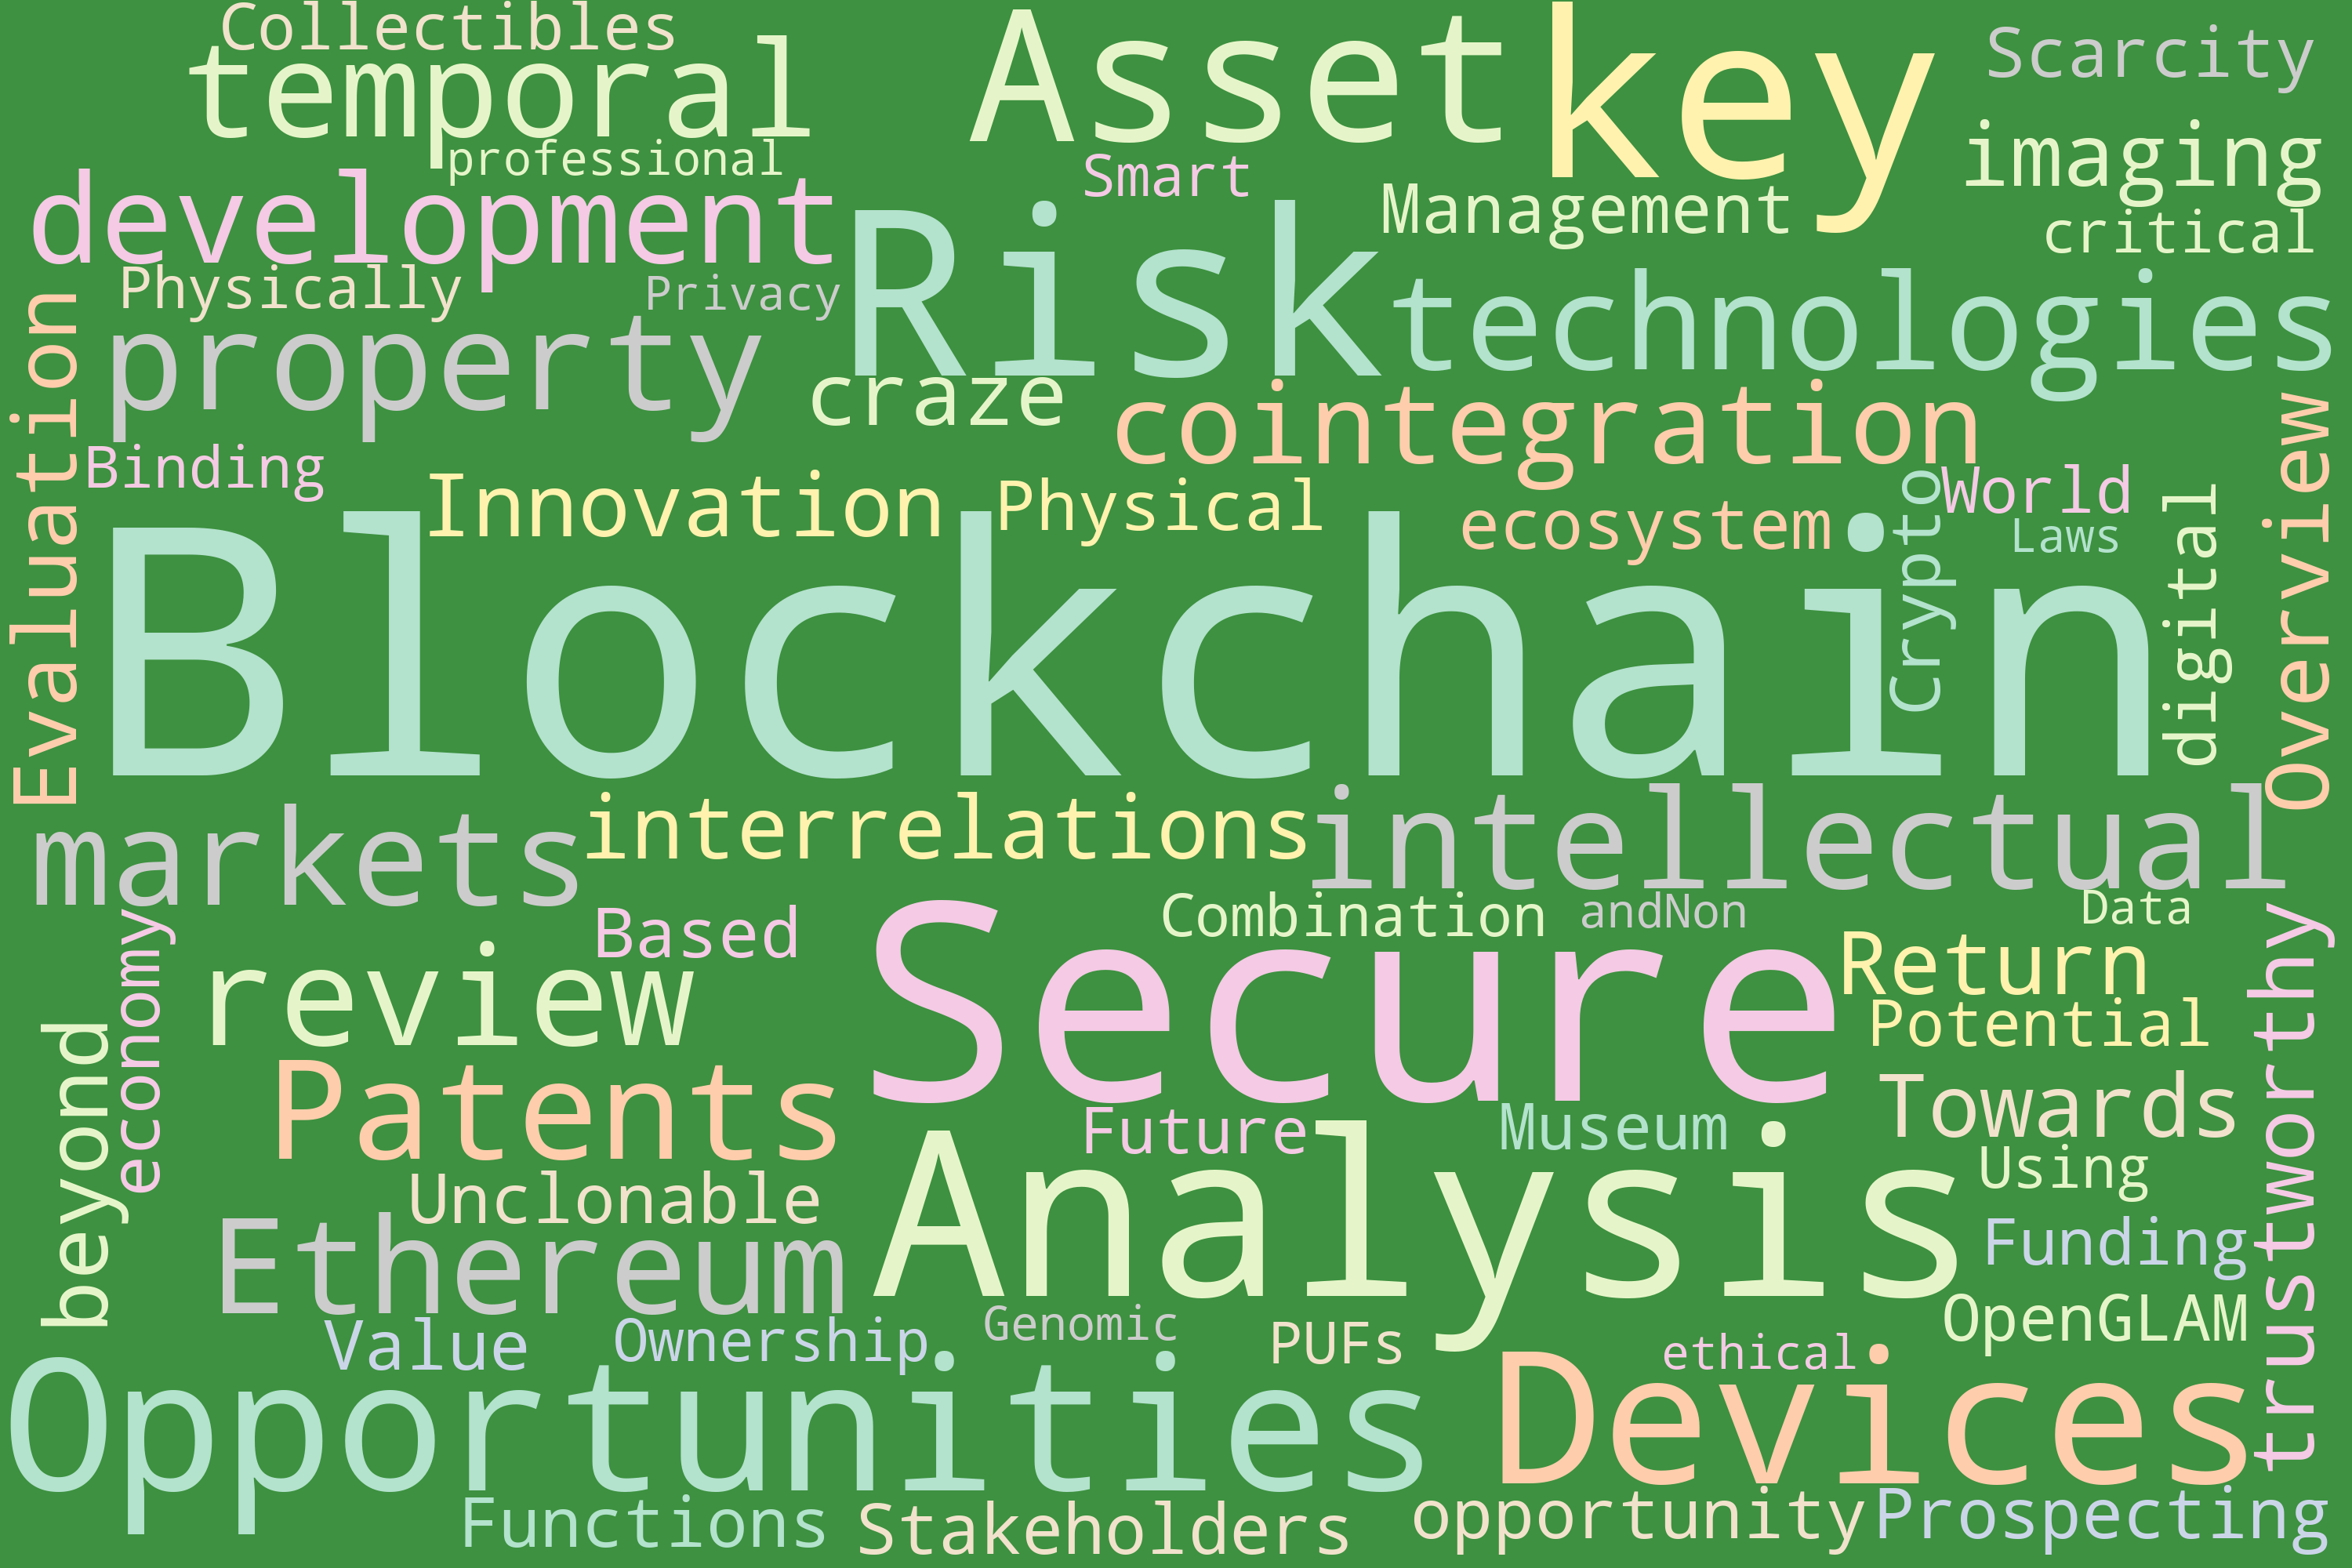

In [18]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

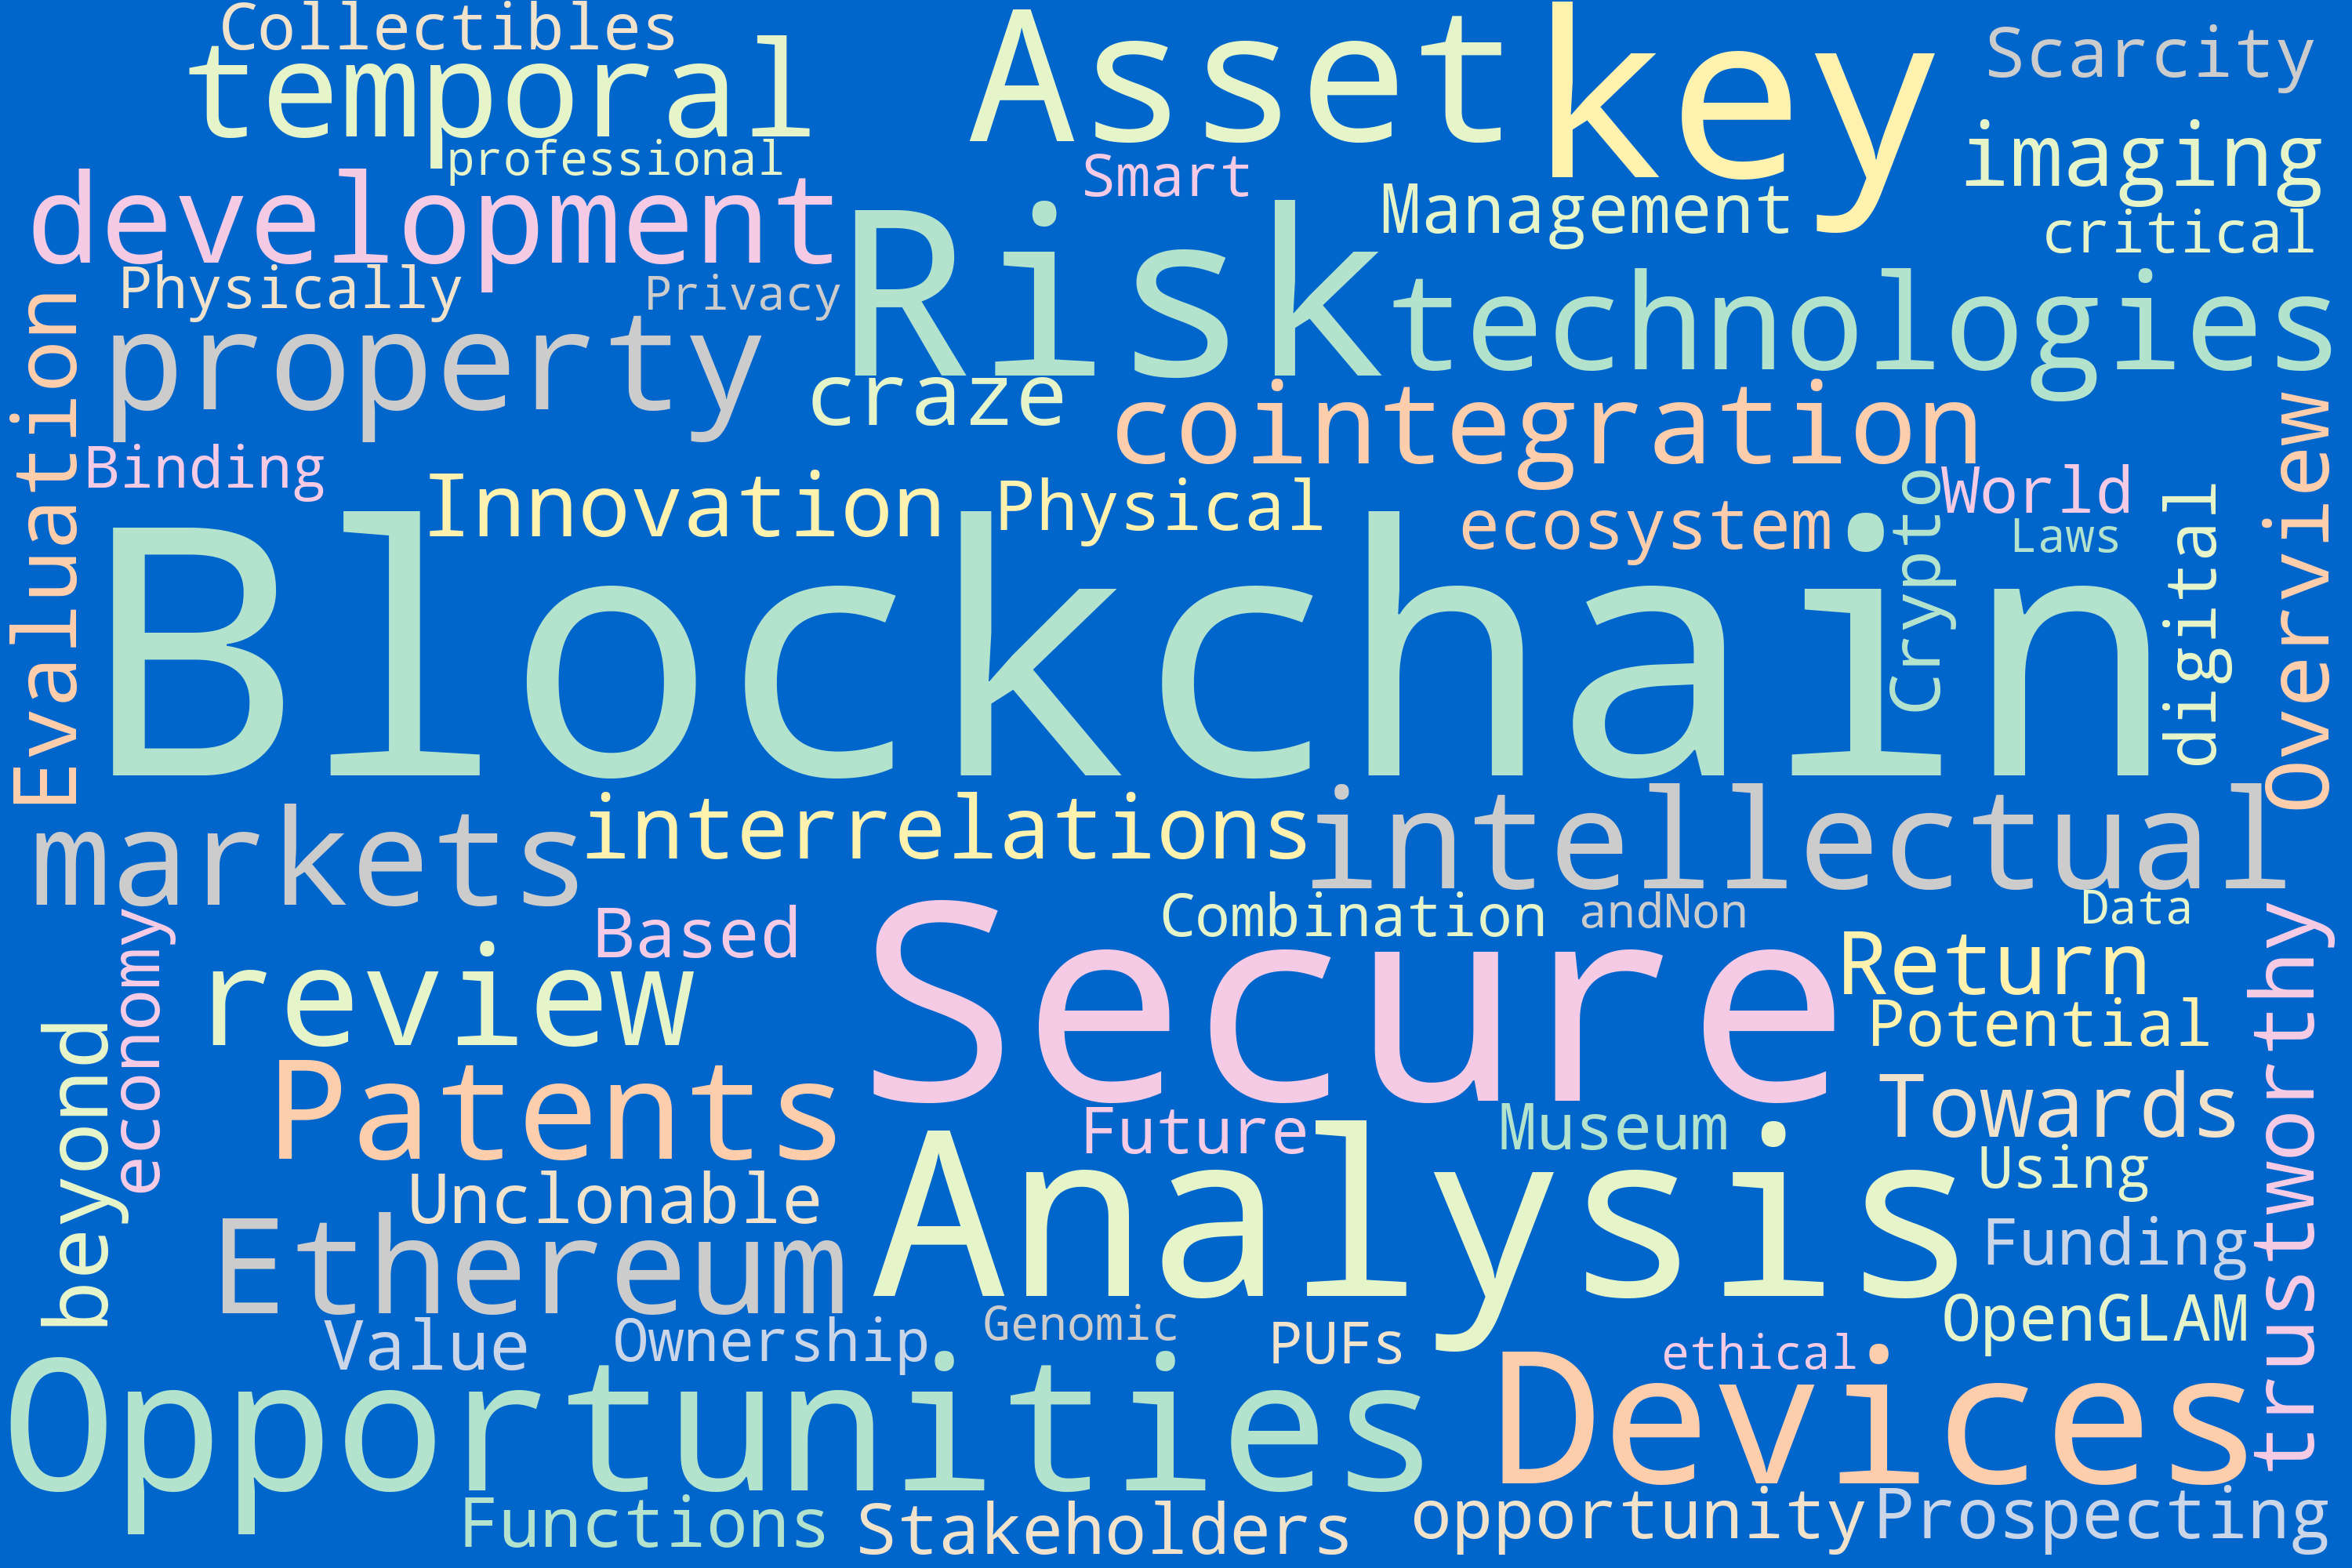

In [19]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [20]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"The nonfungible token (NFT) marketplace spiked in the recent past. The concept originated initially as a token standard of Ethereum, an open-source blockchain with smart contract functionality, where each token is characterized by distinguishable signs. These types of tokens have unique digital properties that allow their distinct identification. NFTs, with their distinct qualities, can be fluidly traded with customized values according to their ages, rarity, and liquidity. The trading of NFTs has heavily influenced the growth of the decentralized application (dApp) marketplace, as exponential returns (thousand folds from their original value) on its ever-expanding market are being observed, leading to worldwide attention. However, the NFT ecosystem is in its nascence, and the associated technologies are still in their infancy. New researchers might be fascinated with the exponential, yet nebulous evolution of NFTs; however, this novelty has contributed to the paucity of systematic an

In [21]:
stop_words = stopwords.words('english')
stop_words.extend(['.','NFT','NFTs','challenge','challenges','Non-Fungible','None','Non','IoT','Fungible','Token','Tokens','token','tokens'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

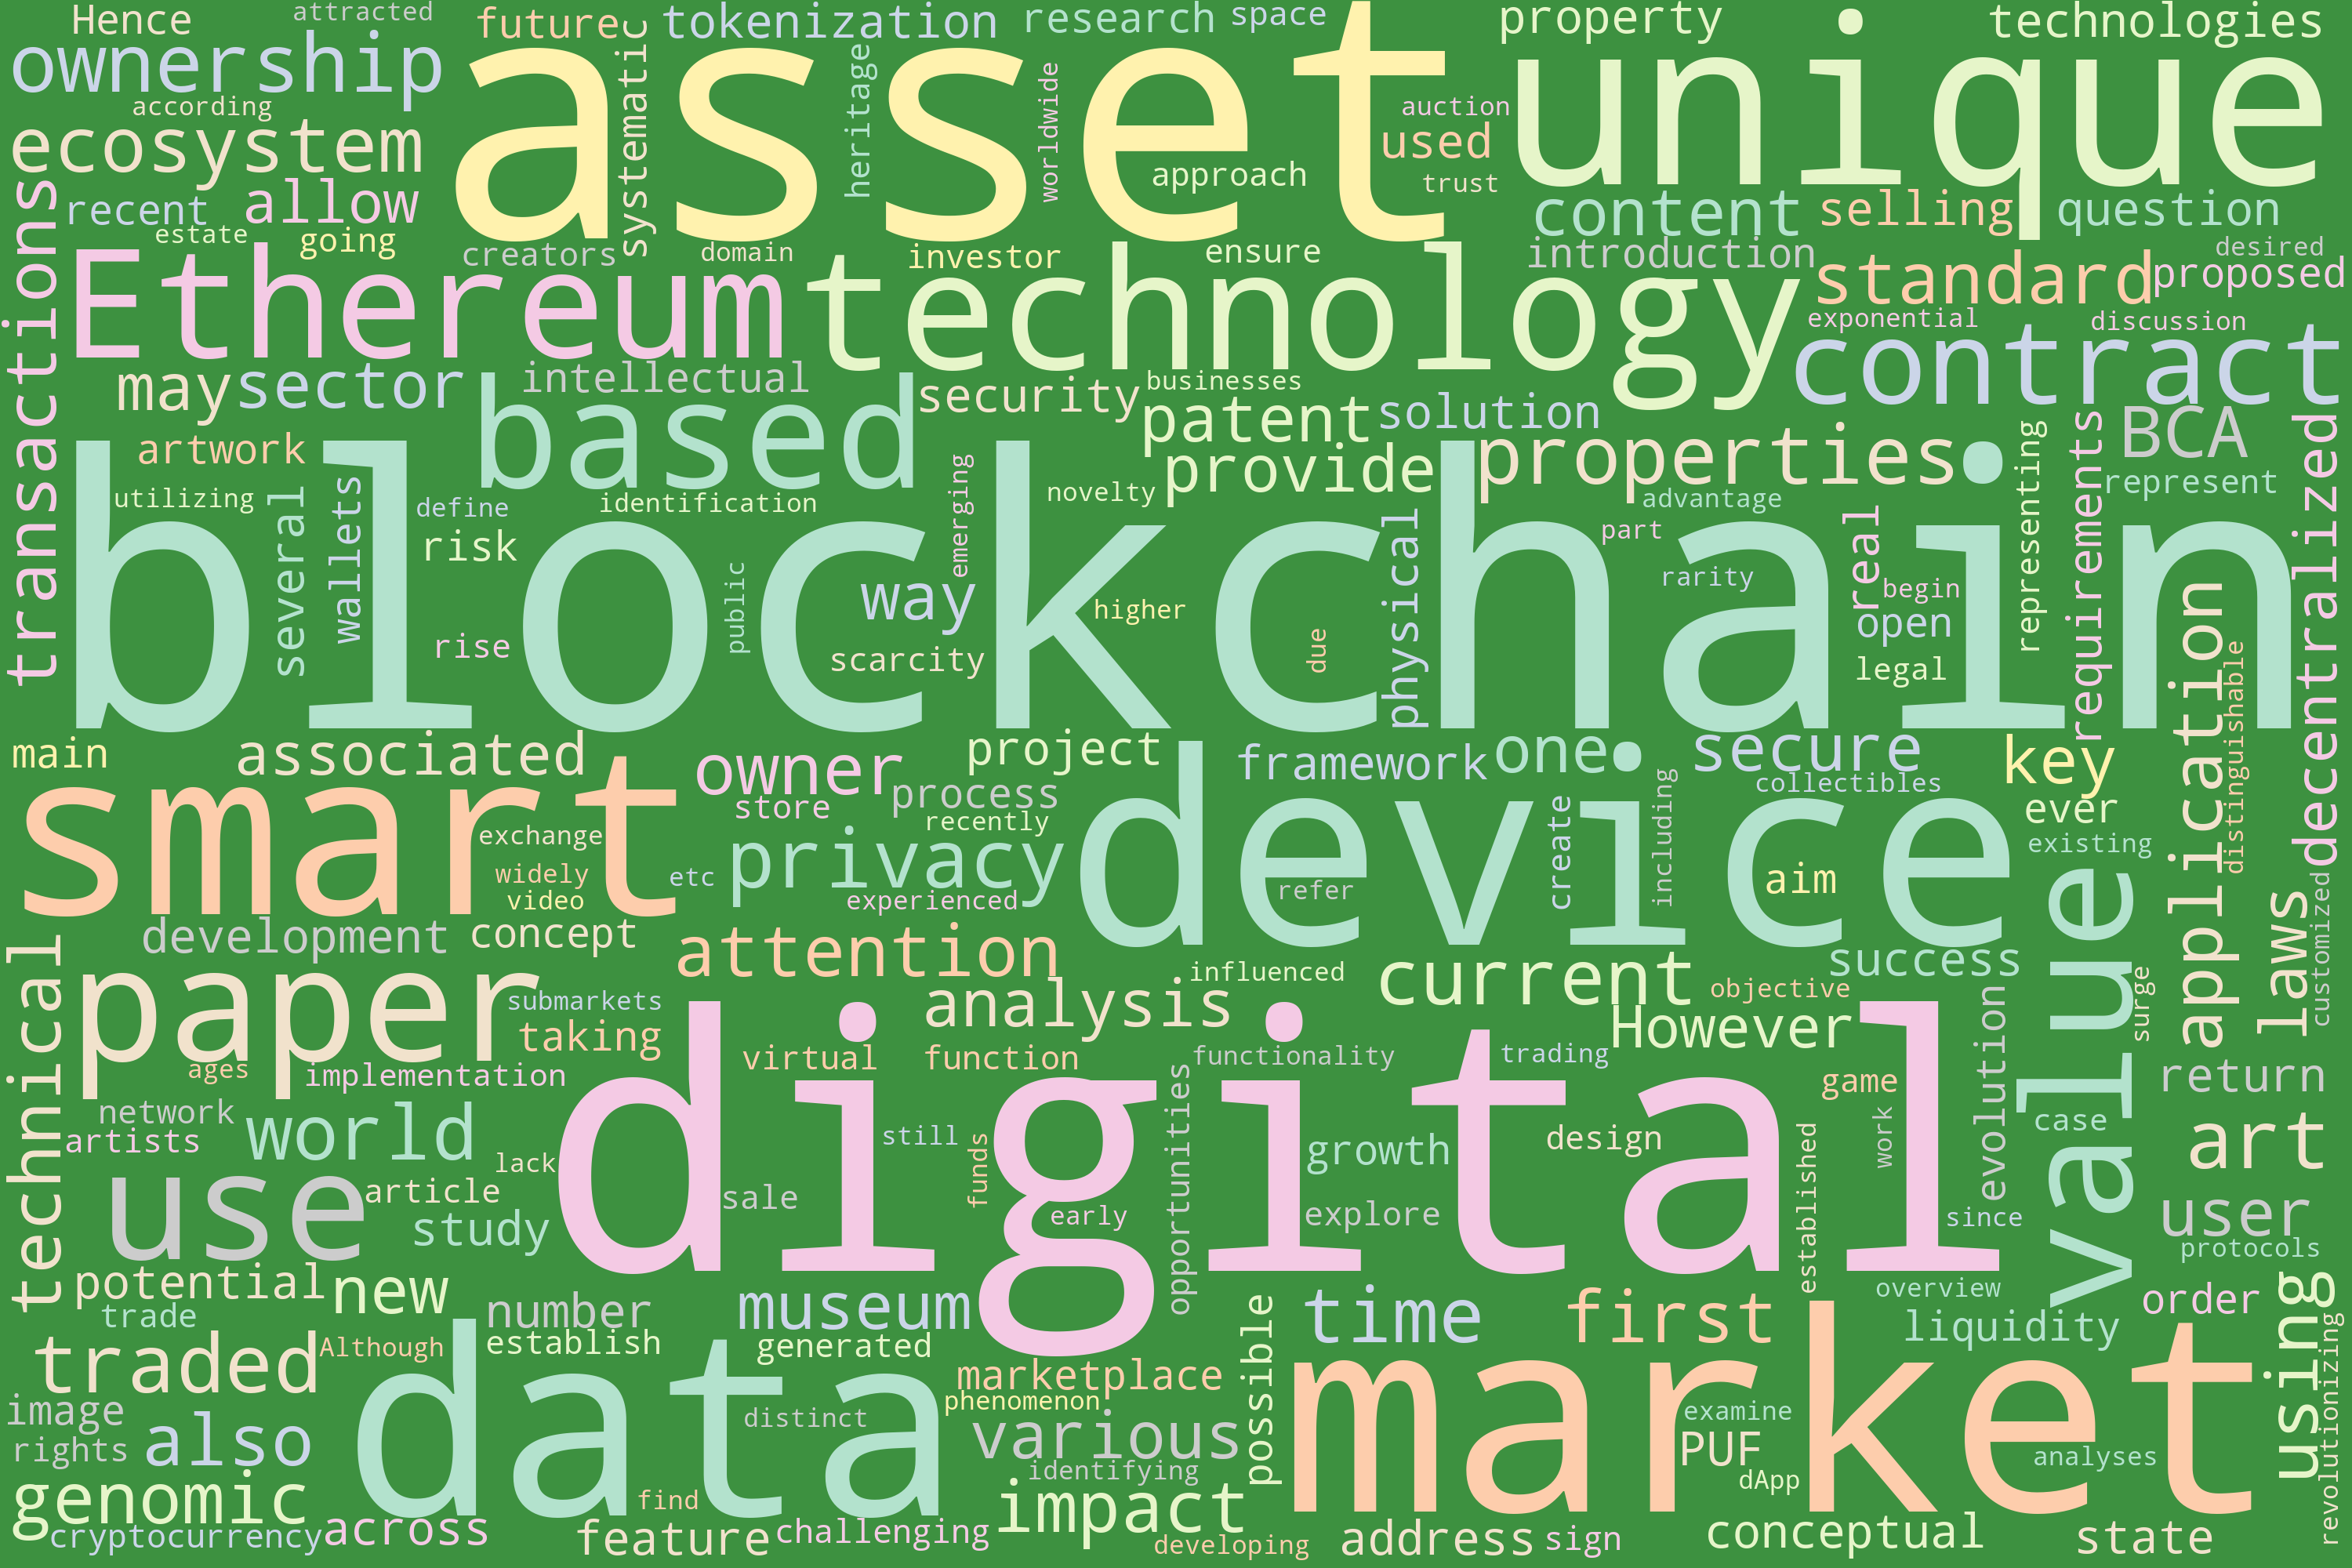

In [22]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

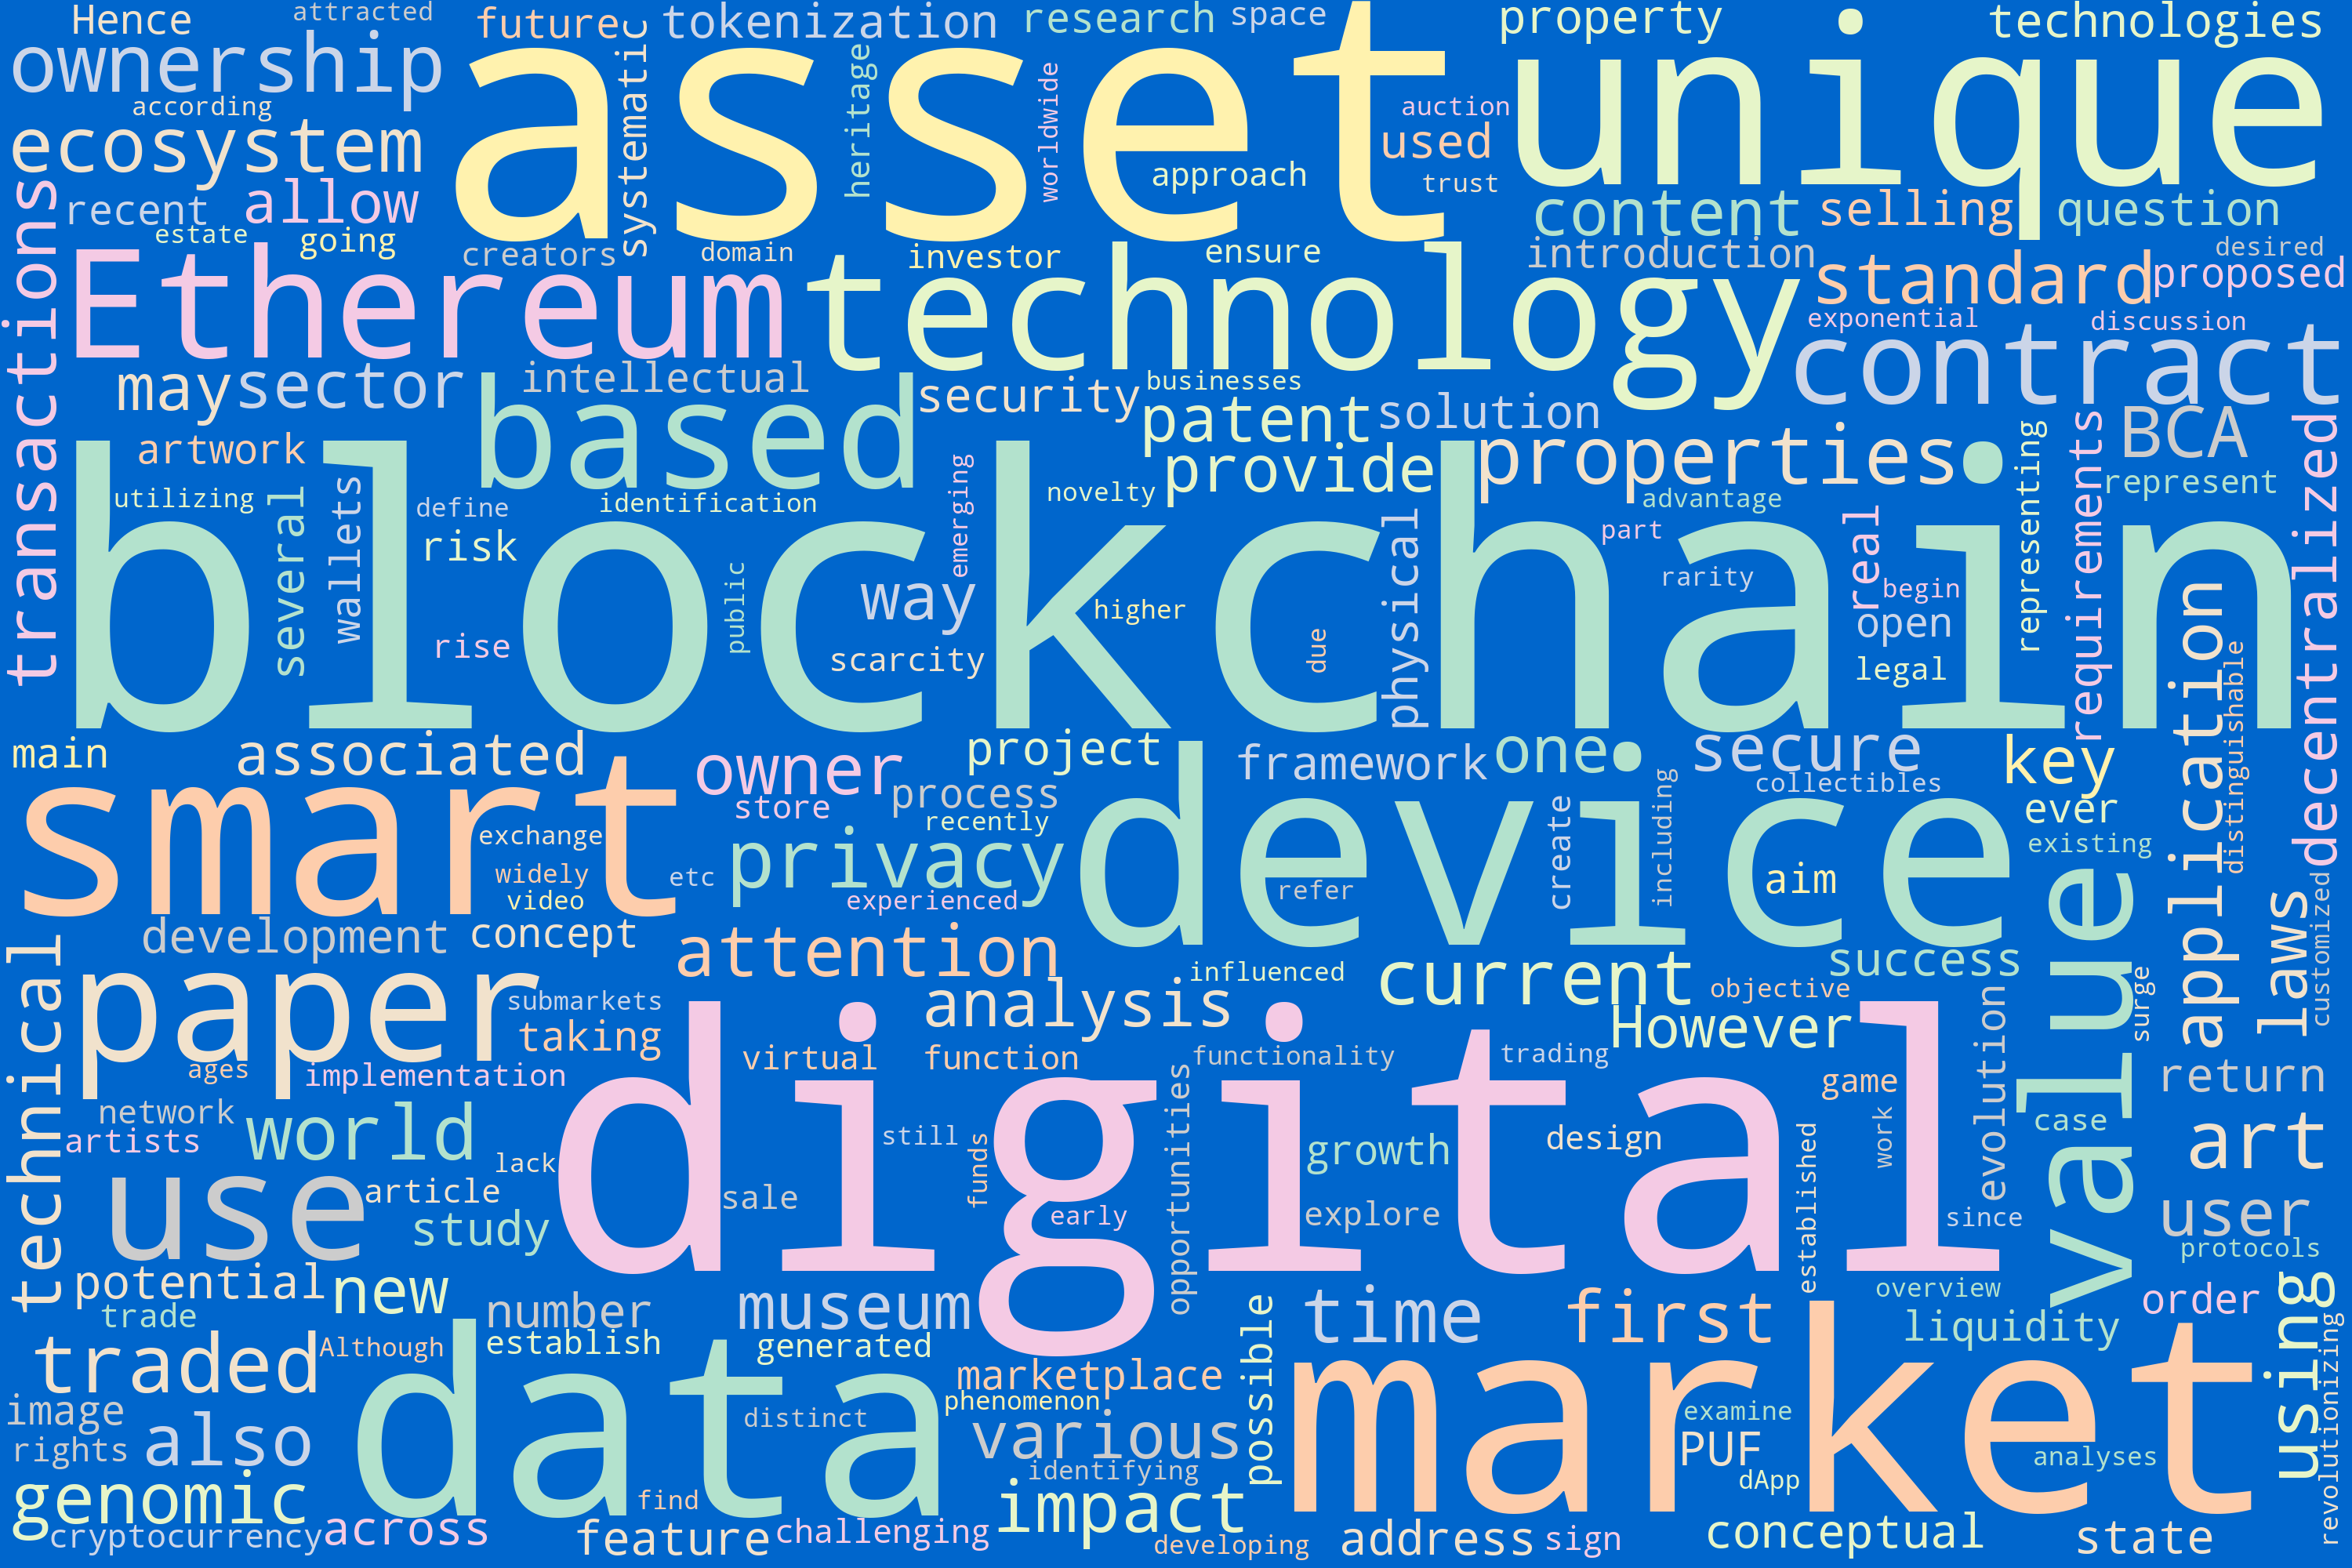

In [23]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [24]:
df.columns

Index(['Title', 'Abstract'], dtype='object')

In [25]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [26]:
df_Title  = df['Title'].str.lower()

In [27]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

' review of the key challenges of non-fungible tokens  patents and intellectual property\nassets as non‑fungible tokens; key\ntechnologies and challenges  non-fungible token  nft  markets on the ethereum blockchain  temporal development, cointegration and interrelations  towards secure and trustworthy imaging with non-fungible tokens  non-fungible tokens  nft   the analysis of risk and return  non-fungible tokens  nft  – innovation beyond the craze  non-fungible token  nft   overview, evaluation, opportunities and challenges  prospecting non-fungible tokens in the digital economy  stakeholders and ecosystem, risk and opportunity  non-fungible tokens  blockchains, scarcity, and value  secure management of iot devices based on blockchain non-fungible tokens and physical unclonable functions  crypto collectibles, museum funding and openglam  challenges, opportunities and the potential of non-fungible tokens  nfts   the world of nfts  non-fungible tokens   the future of blockchain and asse

In [28]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [29]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [30]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [32]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['review',
 'of',
 'the',
 'key',
 'challenge',
 'of',
 'non-fungible',
 'token',
 'patent',
 'and',
 'intellectual',
 'property',
 'asset',
 'a',
 'non‑fungible',
 'tokens;',
 'key',
 'technology',
 'and',
 'challenge',
 'non-fungible',
 'token',
 'nft',
 'market',
 'on',
 'the',
 'ethereum',
 'blockchain',
 'temporal',
 'development,',
 'cointegration',
 'and',
 'interrelation',
 'towards',
 'secure',
 'and',
 'trustworthy',
 'imaging',
 'with',
 'non-fungible',
 'token',
 'non-fungible',
 'token',
 'nft',
 'the',
 'analysis',
 'of',
 'risk',
 'and',
 'return',
 'non-fungible',
 'token',
 'nft',
 '–',
 'innovation',
 'beyond',
 'the',
 'craze',
 'non-fungible',
 'token',
 'nft',
 'overview,',
 'evaluation,',
 'opportunity',
 'and',
 'challenge',
 'prospecting',
 'non-fungible',
 'token',
 'in',
 'the',
 'digital',
 'economy',
 'stakeholder',
 'and',
 'ecosystem,',
 'risk',
 'and',
 'opportunity',
 'non-fungible',
 'token',
 'blockchains,',
 'scarcity,',
 'and',
 'value',
 'secure',
 

In [38]:
stop_words = stopwords.words('english')
stop_words.extend([',','NFT','NFTs','challenge','challenges','Non-Fungible','None','Non','IoT','Fungible','Token','Tokens','token','tokens',':','A','on','in','into','the','for','.'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','NFT','NFTs','challenge','challenges','Non-Fungible','None','Non','IoT','Fungible','Token','Tokens','token','tokens','non-fungible','nft','nfts']]
words_nsw

['review',
 'key',
 'patent',
 'intellectual',
 'property',
 'asset',
 'non‑fungible',
 'tokens;',
 'key',
 'technology',
 'market',
 'ethereum',
 'blockchain',
 'temporal',
 'development,',
 'cointegration',
 'interrelation',
 'towards',
 'secure',
 'trustworthy',
 'imaging',
 'analysis',
 'risk',
 'return',
 '–',
 'innovation',
 'beyond',
 'craze',
 'overview,',
 'evaluation,',
 'opportunity',
 'prospecting',
 'digital',
 'economy',
 'stakeholder',
 'ecosystem,',
 'risk',
 'opportunity',
 'blockchains,',
 'scarcity,',
 'value',
 'secure',
 'management',
 'iot',
 'device',
 'based',
 'blockchain',
 'physical',
 'unclonable',
 'function',
 'crypto',
 'collectibles,',
 'museum',
 'funding',
 'openglam',
 'challenges,',
 'opportunity',
 'potential',
 'world',
 'future',
 'blockchain',
 'asset',
 'ownership',
 'secure',
 'combination',
 'iot',
 'blockchain',
 'physically',
 'binding',
 'iot',
 'device',
 'smart',
 'using',
 'pufs',
 'critical',
 'professional',
 'ethical',
 'analysis',
 '

In [39]:
import collections

In [40]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [41]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0                (iot, device)       2
41             (value, secure)       1
59        (future, blockchain)       1
58             (world, future)       1
57          (potential, world)       1
56    (opportunity, potential)       1
55  (challenges,, opportunity)       1
54     (openglam, challenges,)       1
53         (funding, openglam)       1
52           (museum, funding)       1
51     (collectibles,, museum)       1
50     (crypto, collectibles,)       1
49          (function, crypto)       1
48      (unclonable, function)       1
47      (physical, unclonable)       1
46      (blockchain, physical)       1
45         (based, blockchain)       1
44             (device, based)       1
43           (management, iot)       1
60         (blockchain, asset)       1

In [42]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
             (iot, device) &       2 \\
           (value, secure) &       1 \\
      (future, blockchain) &       1 \\
           (world, future) &       1 \\
        (potential, world) &       1 \\
  (opportunity, potential) &       1 \\
(challenges,, opportunity) &       1 \\
   (openglam, challenges,) &       1 \\
       (funding, openglam) &       1 \\
         (museum, funding) &       1 \\
   (collectibles,, museum) &       1 \\
   (crypto, collectibles,) &       1 \\
        (function, crypto) &       1 \\
    (unclonable, function) &       1 \\
    (physical, unclonable) &       1 \\
    (blockchain, physical) &       1 \\
       (based, blockchain) &       1 \\
           (device, based) &       1 \\
         (management, iot) &       1 \\
       (blockchain, asset) &       1 \\
        (asset, ownership) &       1 \\
       (ownership, secure) &       1 \\
          (pufs, critical) &       1 \\
  

In [43]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('iot', 'device')              |        2 |
| ('value', 'secure')            |        1 |
| ('future', 'blockchain')       |        1 |
| ('world', 'future')            |        1 |
| ('potential', 'world')         |        1 |
| ('opportunity', 'potential')   |        1 |
| ('challenges,', 'opportunity') |        1 |
| ('openglam', 'challenges,')    |        1 |
| ('funding', 'openglam')        |        1 |
| ('museum', 'funding')          |        1 |
| ('collectibles,', 'museum')    |        1 |
| ('crypto', 'collectibles,')    |        1 |
| ('function', 'crypto')         |        1 |
| ('unclonable', 'function')     |        1 |
| ('physical', 'unclonable')     |        1 |
| ('blockchain', 'physical')     |        1 |
| ('based', 'blockchain')        |        1 |
| ('device', 'based')            |        1 |
| ('management', 'iot')          |        1 |
| ('blockchain', 'asset')        |

In [44]:
title_bigram.to_csv("title_bigram.csv")

In [45]:
import networkx as nx

In [46]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [47]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [48]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

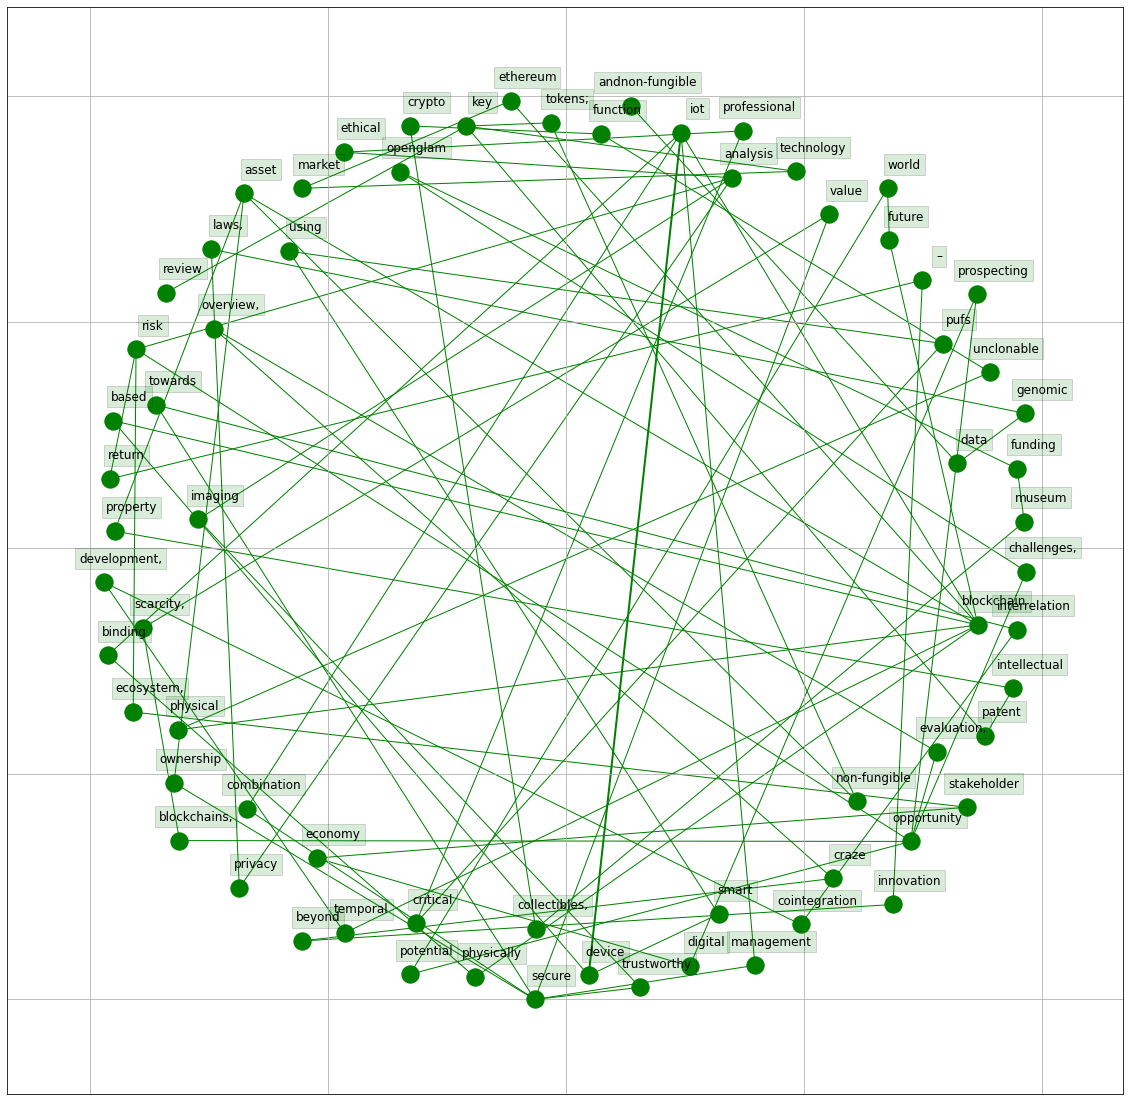

In [49]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [50]:
import igviz as ig

In [51]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [52]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-52-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [53]:
df_Abstract = df['Abstract'].str.lower()

In [54]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"the nonfungible token  nft  marketplace spiked in the recent past  the concept originated initially as token standard of ethereum  an open-source blockchain with smart contract functionality  where each token is characterized by distinguishable signs  these types of tokens have unique digital properties that allow their distinct identification  nfts  with their distinct qualities  can be fluidly traded with customized values according to their ages  rarity  and liquidity  the trading of nfts has heavily influenced the growth of the decentralized application  dapp  marketplace  as exponential returns  thousand folds from their original value  on its ever-expanding market are being observed  leading to worldwide attention  however  the nft ecosystem is in its nascence  and the associated technologies are still in their infancy  new researchers might be fascinated with the exponential  yet nebulous evolution of nfts; however  this novelty has contributed to the paucity of systematic and 

In [55]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [56]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [57]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['the',
 'nonfungible',
 'token',
 'nft',
 'marketplace',
 'spiked',
 'in',
 'the',
 'recent',
 'past',
 'the',
 'concept',
 'originated',
 'initially',
 'a',
 'token',
 'standard',
 'of',
 'ethereum',
 'an',
 'open-source',
 'blockchain',
 'with',
 'smart',
 'contract',
 'functionality',
 'where',
 'each',
 'token',
 'is',
 'characterized',
 'by',
 'distinguishable',
 'sign',
 'these',
 'type',
 'of',
 'token',
 'have',
 'unique',
 'digital',
 'property',
 'that',
 'allow',
 'their',
 'distinct',
 'identification',
 'nfts',
 'with',
 'their',
 'distinct',
 'quality',
 'can',
 'be',
 'fluidly',
 'traded',
 'with',
 'customized',
 'value',
 'according',
 'to',
 'their',
 'age',
 'rarity',
 'and',
 'liquidity',
 'the',
 'trading',
 'of',
 'nfts',
 'ha',
 'heavily',
 'influenced',
 'the',
 'growth',
 'of',
 'the',
 'decentralized',
 'application',
 'dapp',
 'marketplace',
 'a',
 'exponential',
 'return',
 'thousand',
 'fold',
 'from',
 'their',
 'original',
 'value',
 'on',
 'it',
 'ever-

In [59]:
stop_words = stopwords.words('english')
stop_words.extend([',','NFT','NFTs','challenge','challenges','Non-Fungible','None','Non','IoT','Fungible','Token','Tokens','token','tokens','non-fungible','nft','nfts',':','A','on','in','into','the','for','review','.'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','NFT','NFTs','challenge','challenges','Non-Fungible','None','Non','IoT','Fungible','Token','Tokens','token','tokens','non-fungible','nft','nfts',]]
words_nsw

['nonfungible',
 'marketplace',
 'spiked',
 'recent',
 'past',
 'concept',
 'originated',
 'initially',
 'standard',
 'ethereum',
 'open-source',
 'blockchain',
 'smart',
 'contract',
 'functionality',
 'characterized',
 'distinguishable',
 'sign',
 'type',
 'unique',
 'digital',
 'property',
 'allow',
 'distinct',
 'identification',
 'distinct',
 'quality',
 'fluidly',
 'traded',
 'customized',
 'value',
 'according',
 'age',
 'rarity',
 'liquidity',
 'trading',
 'ha',
 'heavily',
 'influenced',
 'growth',
 'decentralized',
 'application',
 'dapp',
 'marketplace',
 'exponential',
 'return',
 'thousand',
 'fold',
 'original',
 'value',
 'ever-expanding',
 'market',
 'observed',
 'leading',
 'worldwide',
 'attention',
 'however',
 'ecosystem',
 'nascence',
 'associated',
 'technology',
 'still',
 'infancy',
 'new',
 'researcher',
 'might',
 'fascinated',
 'exponential',
 'yet',
 'nebulous',
 'evolution',
 'nfts;',
 'however',
 'novelty',
 'ha',
 'contributed',
 'paucity',
 'systematic',

In [60]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [61]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0            (digital, asset)      13
1               (iot, device)      10
2           (smart, contract)       7
3    (blockchain, technology)       7
4              (privacy, law)       4
5             (genomic, data)       4
8        (ownership, digital)       3
9                 (use, case)       3
7    (intellectual, property)       3
6           (unique, digital)       3
38           (digital, image)       2
30             (digital, art)       2
31             (process, new)       2
32         (content, creator)       2
33               (paper, aim)       2
34      (blockchain, account)       2
35     (physical, unclonable)       2
37            (function, puf)       2
43              (owner, user)       2
39         (heritage, sector)       2
40    (environmental, impact)       2
41  (representing, ownership)       2
42             (bca, address)       2
28             (market, time)       2
44       (legal, requirement)       2

In [62]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                          bigram &  counts \\
\midrule
                (digital, asset) &      13 \\
                   (iot, device) &      10 \\
               (smart, contract) &       7 \\
        (blockchain, technology) &       7 \\
                  (privacy, law) &       4 \\
                 (genomic, data) &       4 \\
            (ownership, digital) &       3 \\
                     (use, case) &       3 \\
        (intellectual, property) &       3 \\
               (unique, digital) &       3 \\
                (digital, image) &       2 \\
                  (digital, art) &       2 \\
                  (process, new) &       2 \\
              (content, creator) &       2 \\
                    (paper, aim) &       2 \\
           (blockchain, account) &       2 \\
          (physical, unclonable) &       2 \\
                 (function, puf) &       2 \\
                   (owner, user) &       2 \\
              (heritage, sector) &       2

In [63]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                        |   counts |
|:------------------------------|---------:|
| ('digital', 'asset')          |       13 |
| ('iot', 'device')             |       10 |
| ('smart', 'contract')         |        7 |
| ('blockchain', 'technology')  |        7 |
| ('privacy', 'law')            |        4 |
| ('genomic', 'data')           |        4 |
| ('ownership', 'digital')      |        3 |
| ('use', 'case')               |        3 |
| ('intellectual', 'property')  |        3 |
| ('unique', 'digital')         |        3 |
| ('digital', 'image')          |        2 |
| ('digital', 'art')            |        2 |
| ('process', 'new')            |        2 |
| ('content', 'creator')        |        2 |
| ('paper', 'aim')              |        2 |
| ('blockchain', 'account')     |        2 |
| ('physical', 'unclonable')    |        2 |
| ('function', 'puf')           |        2 |
| ('owner', 'user')             |        2 |
| ('heritage', 'sector')        |        2 |
| ('enviro

In [64]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [65]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [66]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

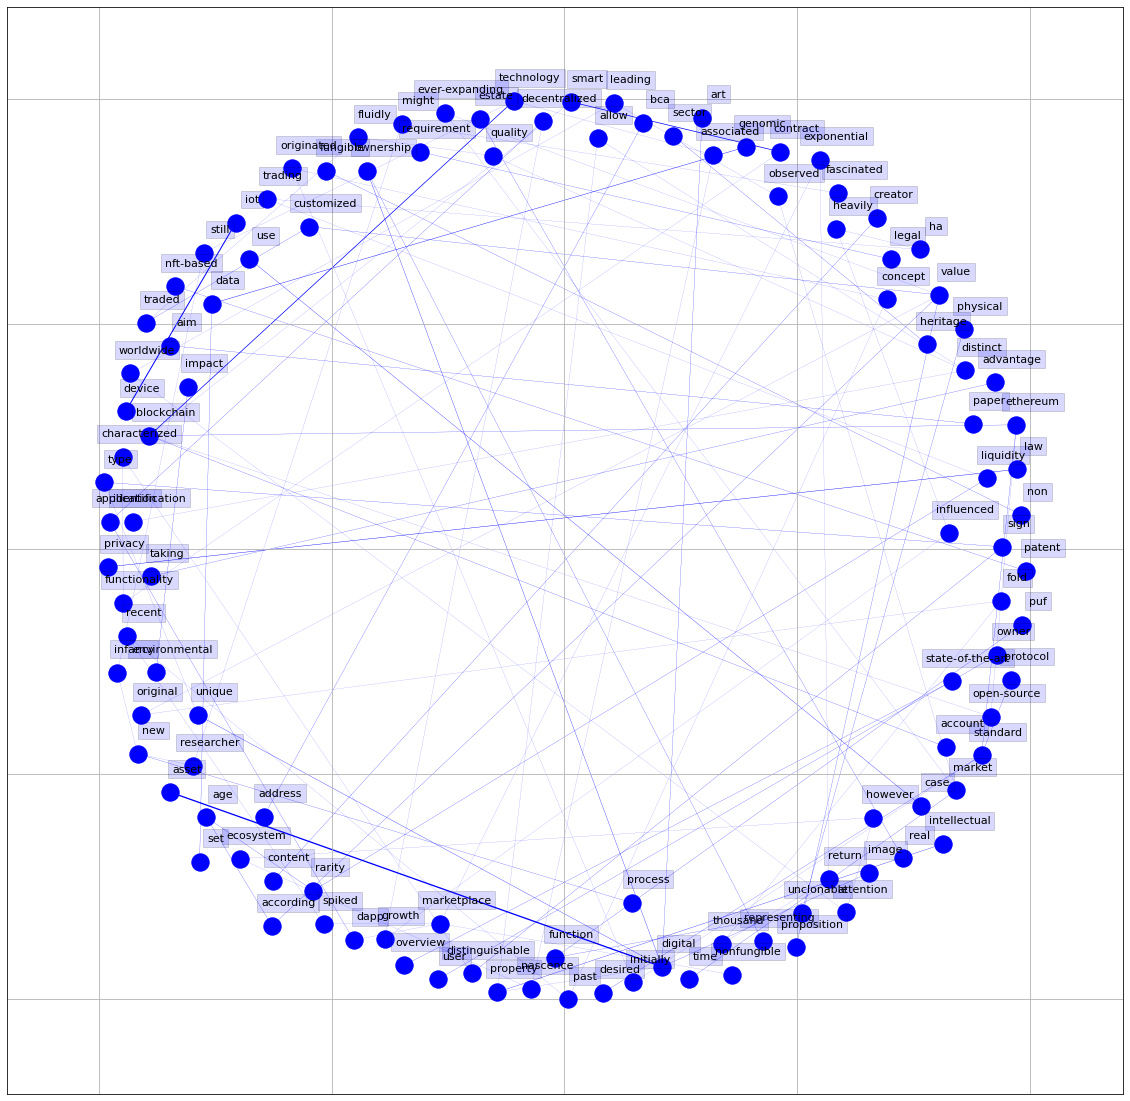

In [67]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [68]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [69]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-69-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

